# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [29]:
def F(n):
    # Start coding
    assert n >= 0 and n < 27 and int(n) == n
    for i in range(n):
        x = [ord('-') for _ in range(n - i - 1)]
        x +=  [ord('A') + (i - j) for j in range(i)]
        x += [ord('A') + j for j in range(i + 1)]
        x += [ord('-') for _ in range(n - i - 1)]
        print(''.join(map(chr, x)))

# Tests
F(10)
F(6)

---------A---------
--------BAB--------
-------CBABC-------
------DCBABCD------
-----EDCBABCDE-----
----FEDCBABCDEF----
---GFEDCBABCDEFG---
--HGFEDCBABCDEFGH--
-IHGFEDCBABCDEFGHI-
JIHGFEDCBABCDEFGHIJ
-----A-----
----BAB----
---CBABC---
--DCBABCD--
-EDCBABCDE-
FEDCBABCDEF


## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [30]:
def F(d : dict):
    # Start coding

    # sorted in ascending order of key
    for key in sorted(d):
        print(key, d[key][0], d[key][1])

    arr1 = [(d[key][0], d[key][1], key) for key in d]
    arr2 = [(d[key][1], d[key][0], key) for key in d]

    # sorted in descending order of x
    for entry in sorted(arr1, reverse=True):
        print(str(entry[2]) + ',' + str(entry[0]) + ',' + str(entry[1]))

    # sorted in ascending order of y
    for entry in sorted(arr2):
        print(str(entry[2]) + ',' + str(entry[1]) + ',' + str(entry[0]))

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

1 1 2
2 -1 4
4 2 3
5 -4 3
4,2,3
1,1,2
2,-1,4
5,-4,3
1,1,2
5,-4,3
4,2,3
2,-1,4
-8 4 2
5 9 -10
6 -3 4
7 2 1
5,9,-10
-8,4,2
7,2,1
6,-3,4
5,9,-10
7,2,1
-8,4,2
6,-3,4


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [31]:
#TODO
file = open('student_records.csv', 'r')
lines = file.readlines()
for i in range(10):
    print(lines[i].strip())

roll_number,department,credit,course_name,course_type,grade
588946,MA,3,EC250,hasmed_elective,AB
145372,EP,4,EP407,hasmed_elective,CC
834515,MA,8,EP885,hasmed_elective,BB
344265,CSE,6,CSE699,honours,AB
358405,MA,3,EE460,minor,AP
781075,CE,8,CE540,honours,CC
180828,CSE,6,CE880,minor,AB
981238,MM,4,CSE226,minor,AB
836881,MM,8,MM530,core,AA


#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=9, BC=7, CC=6)

In [32]:
#TODO
grade_map = {'AP': 10, 'AA': 10, 'AB': 9, 'BB': 8, 'BC': 7, 'CC': 6}
# roll_number: (total credits, cgp, core, dept_elec, flex_elec, hasmed_elec, honours)
students_records = {}
students_minor_records = {}

# storing records in dict
for i in range(1, len(lines)-1):
    record = lines[i].strip().split(',')
    credits = int(record[2])
    if record[0] not in students_records:
        students_records[record[0]] = [0, 0, 0, 0, 0, 0, 0]
        students_minor_records[record[0]] = {}

    students_records[record[0]][0] += credits
    students_records[record[0]][1] += credits*grade_map[record[5]]
    if record[4] == 'core':
        students_records[record[0]][2] += credits
    elif record[4] == 'department_elective':
        students_records[record[0]][3] += credits
    elif record[4] == 'felxible_elective':
        students_records[record[0]][4] += credits
    elif record[4] == 'hasmed_elective':
        students_records[record[0]][5] += credits
    elif record[4] == 'honours':
        students_records[record[0]][6] += credits
    elif record[4] == 'minor':
        if record[3][0:1] in students_minor_records[record[0]]:
            students_minor_records[record[0]][record[3][0:1]] += credits
        else:
            students_minor_records[record[0]][record[3][0:1]] = credits
    
# printing
print('Roll number', 'Total Credits', 'CPI', sep=',')
for roll in students_records:
    print(roll, students_records[roll][0], students_records[roll][1]/students_records[roll][0], sep=',')


Roll number,Total Credits,CPI
588946,199,8.693467336683417
145372,173,7.745664739884393
834515,199,8.21608040201005
344265,153,8.699346405228757
358405,206,8.587378640776699
781075,246,8.170731707317072
180828,177,8.096045197740112
981238,168,8.244047619047619
836881,246,8.386178861788618
310604,198,8.333333333333334
847809,261,8.210727969348659
773982,264,8.068181818181818
500658,208,8.16826923076923
810863,192,8.151041666666666
124663,229,8.126637554585153
364146,225,8.395555555555555
871746,216,8.212962962962964
270007,241,8.033195020746888
597353,200,8.12
986057,199,8.06532663316583
718510,184,8.429347826086957
836431,160,7.9
379479,260,8.246153846153845
582912,221,8.656108597285067
788020,193,8.015544041450777
613401,209,8.440191387559809
144528,228,8.157894736842104
485484,216,8.36111111111111
680096,153,8.045751633986928
199713,172,8.290697674418604
851029,161,8.322981366459627
845623,237,8.375527426160337
150503,173,8.289017341040463
214270,229,7.877729257641922
517837,205,8.58

#### 2.c: Print out the names of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [33]:
#TODO
for roll in students_records:
    if students_records[roll][2] >= 20 and students_records[roll][3] >= 15 and students_records[roll][4] >= 10 and students_records[roll][5] >= 5:
        print(roll)

588946
834515
781075
180828
981238
836881
310604
773982
500658
810863
124663
871746
986057
379479
144528
485484
845623
150503
214270
517837
482623
721490
955757
143856
571782
973158
703403
960395
521087
461971
879634
716985
265922
283796
203200
327122
534763
391848
971123
207443
488661
782129
928288
581858
282482
572815
608952
628849
630568
388969
159438
970791
143142
998293
681499
888886
608522
362471
692318
626000
581065
787967
381227
750259
881983
294697


#### 2.d: Print out the names of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [34]:
#TODO
for roll in students_minor_records:
    for dept in students_minor_records[roll]:
        if students_minor_records[roll][dept] >= 10:
            print(roll)
            break

588946
145372
344265
358405
781075
981238
836881
847809
773982
500658
810863
124663
364146
270007
597353
986057
718510
836431
379479
582912
788020
613401
144528
680096
199713
851029
845623
214270
517837
482623
721490
955757
143856
571782
973158
703403
960395
521087
461971
879634
716985
265922
283796
203200
301135
381526
391848
329535
971123
782129
581858
733782
572815
608952
628849
630568
388969
159438
478606
995208
970791
143142
907454
681499
888886
362471
465496
208100
138296
775967
461584
458200
581065
787967
381227
750259
816041
993835


#### 2.e: Print out the names of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [35]:
#TODO
for roll in students_records:
    if students_records[roll][6] >= 10 and students_records[roll][2] >= 20:
        print(roll)

588946
145372
834515
781075
836881
310604
773982
500658
810863
124663
364146
871746
986057
718510
379479
582912
788020
613401
144528
485484
199713
845623
150503
214270
517837
482623
721490
955757
589528
143856
571782
973158
703403
960395
521087
461971
879634
716985
265922
283796
203200
327122
534763
391848
971123
207443
488661
782129
928288
581858
282482
572815
608952
628849
630568
388969
159438
870642
970791
143142
998293
681499
888886
608522
362471
465496
208100
692318
626000
458200
581065
787967
750259
881983
294697


# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [36]:
#TODO
from scipy.optimize import minimize

def f(x):
    return 2 * (x[0] - x[1] - 3)**2 + 4 * (x[0] + 2 * x[1] + 1)**4

cons = (
    {'type': 'ineq', 'fun': lambda x: x[0] - x[1] + 3},
    {'type': 'ineq', 'fun': lambda x: 5 - ((x[0] + 2)**2 + (x[1] + 1)**2)}
)

# Initial guess
x0 = [0, 0]

# Perform the minimization
result = minimize(f, x0, constraints=cons)

print("Optimal point:", result.x)
print("Optimal value:", result.fun)

Optimal point: [ 0.23492503 -0.92851489]
Optimal value: 7.345026216976594


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [37]:
import numpy as np
from scipy.integrate import quad

def f(r, t):
    return (r * np.cos(t))**2 + (r * np.sin(t))**4

r = np.sqrt(3)

result = quad(lambda t: f(r, t), 0, 2*np.pi)
print(result[0])

30.630528372500475


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [60]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [61]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    return np.loadtxt(data_path, delimiter=',')

In [62]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers == None:
        return data[np.random.choice(data.shape[0], K)]
    return init_centers

In [63]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    return np.ones(data.shape[0])

In [64]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    # data: Nx2, centres: Kx2
    distances_squared = np.transpose(np.atleast_2d(np.sum(np.square(data), axis=1))) + np.sum(np.square(centers), axis=1) - 2*np.matmul(data, np.transpose(centers))
    distances_squared[distances_squared < 0] = 0
    distances = np.sqrt(distances_squared)
    return distances

In [65]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    return np.argmin(distances, axis=1) + 1

In [66]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    centers = np.zeros((K, data.shape[1]))
    counts = np.zeros(K)
    np.add.at(centers, labels - 1, data)
    np.add.at(counts, labels - 1, 1)
    epsilon = 1e-10
    centers /= (counts[:, None] + epsilon)
    return centers


In [67]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    if np.sum(np.square(labels1 - labels2)) == 0: 
        return False
    return True

In [68]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [69]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'
    plt.title('K-means clustering')

    ### Set xlabel as 'Longitude'
    plt.xlabel('Longitude')

    ### Set ylabel as 'Latitude'
    plt.ylabel('Latitude')

    ### Save the plot as 'kmeans.png'
    plt.savefig('kmeans.png')

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0


<module 'matplotlib.pyplot' from 'd:\\IITB Clubs\\comp_physics\\CPP_Assignment\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

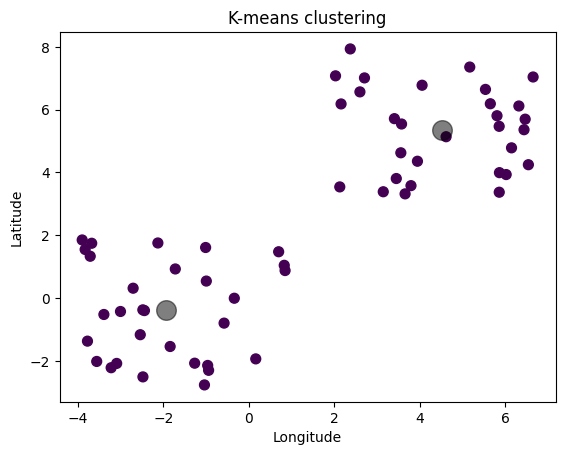

In [70]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)